In [25]:
import pandas as pd
import numpy as np
import random as rnd
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_absolute_error

## load titanic dataset

In [34]:
titanic = pd.read_csv('titanic.csv')

In [35]:
titanic.head(20)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


In [37]:
titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


## data preprocessing

In [38]:
titanic.drop('Name', axis=1, inplace=True)

titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [39]:
# combine two similar features together 

titanic['FamilyMember'] = titanic['Siblings/Spouses Aboard'] + titanic['Parents/Children Aboard']

titanic.drop('Siblings/Spouses Aboard', axis=1, inplace=True)
titanic.drop('Parents/Children Aboard', axis=1, inplace=True)

titanic.head()

,Survived,Pclass,Sex,Age,Fare,FamilyMember
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,1
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,1
4,0,3,male,35.0,8.0500,0


In [40]:
# map the value to integers for binary catgorical data

titanic['Sex'] = titanic['Sex'].map(
{'female': 1, 'male': 0}).astype(int)

In [41]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,FamilyMember
0,0,3,0,22.0,7.2500,1
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,1
4,0,3,0,35.0,8.0500,0


In [42]:
#?pd.cut

In [45]:
# pd.cut can preprocess continuous values into bins 

titanic['AgeBin'] = pd.cut(titanic['Age'], 4, 
                        precision=1, include_lowest=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,FamilyMember,AgeBin,FareBin
0,0,3,0,22.0,7.2500,1,"(20.3, 40.2]","(-0.52, 128.08]"
1,1,1,1,38.0,71.2833,1,"(20.3, 40.2]","(-0.52, 128.08]"
2,1,3,1,26.0,7.9250,0,"(20.3, 40.2]","(-0.52, 128.08]"
3,1,1,1,35.0,53.1000,1,"(20.3, 40.2]","(-0.52, 128.08]"
4,0,3,0,35.0,8.0500,0,"(20.3, 40.2]","(-0.52, 128.08]"


In [46]:
titanic['FareBin'] = pd.cut(titanic['Fare'], 4, 
                        precision=2, include_lowest=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,FamilyMember,AgeBin,FareBin
0,0,3,0,22.0,7.2500,1,"(20.3, 40.2]","(-0.52, 128.08]"
1,1,1,1,38.0,71.2833,1,"(20.3, 40.2]","(-0.52, 128.08]"
2,1,3,1,26.0,7.9250,0,"(20.3, 40.2]","(-0.52, 128.08]"
3,1,1,1,35.0,53.1000,1,"(20.3, 40.2]","(-0.52, 128.08]"
4,0,3,0,35.0,8.0500,0,"(20.3, 40.2]","(-0.52, 128.08]"


## exploratory data analysis

In [50]:
# check the relationship between passenger class and the survival rate

titanic[['Pclass', 'Survived']].groupby(
    ['Pclass'], as_index=False).mean().sort_values(
    by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.244353


In [51]:
# check the relationship between age and the survival rate

titanic[['AgeBin', 'Survived']].groupby(
    ['AgeBin'], as_index=False).mean().sort_values(
    by='AgeBin', ascending=True)

,AgeBin,Survived
0,"(0.19999999999999998, 20.3]",0.418919
1,"(20.3, 40.2]",0.377823
2,"(40.2, 60.1]",0.394737
3,"(60.1, 80.0]",0.192308


In [52]:
# check the relationship between gender and the survival rate

titanic[["Sex", "Survived"]].groupby(
    ['Sex'],as_index=False).mean().sort_values(
    by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.190227


In [53]:
# check the relationship between number of family member and the survival rate

titanic[['FamilyMember', 'Survived']].groupby(
    ['FamilyMember'], as_index=False).mean().sort_values(
    by='Survived', ascending=False)

,FamilyMember,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.305816
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [54]:
# check the relationship between fare price and the survival rate

titanic[['FareBin', 'Survived']].groupby(
    ['FareBin'], as_index=False).mean().sort_values(
    by='FareBin', ascending=True)

,FareBin,Survived
0,"(-0.52, 128.08]",0.369847
1,"(128.08, 256.16]",0.724138
2,"(256.16, 384.25]",0.666667
3,"(384.25, 512.33]",1.000000


## plotting

/Users/junxxx/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


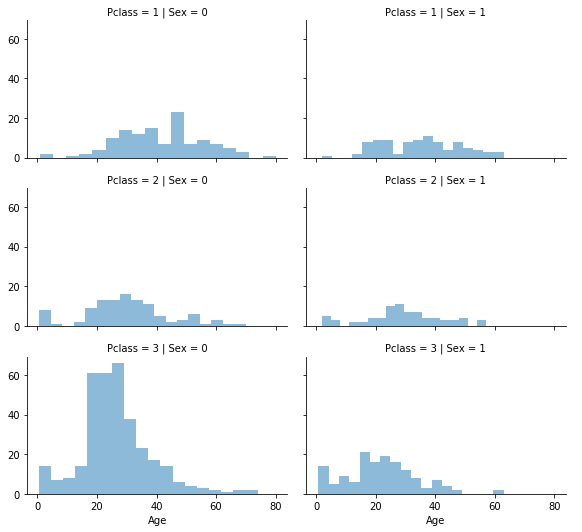

In [56]:
grid = sns.FacetGrid(titanic, row='Pclass', col='Sex', 
                     size=2.50, aspect=1.6)

grid.map(plt.hist, 'Age', alpha=0.5, bins=18)
grid.add_legend()


In [58]:
## drop columns to prepare for model fitting

titanic.drop('AgeBin', axis=1, inplace=True)
titanic.drop('FareBin', axis=1, inplace=True)

titanic.head()

,Survived,Pclass,Sex,Age,Fare,FamilyMember
0,0,3,0,22.0,7.2500,1
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,1
4,0,3,0,35.0,8.0500,0


In [59]:
X = titanic.drop('Survived', axis=1).copy()
y = titanic['Survived'].copy()

X.shape


(887, 5)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 210)

In [61]:
X_train.shape


(709, 5)

In [62]:
y_test.shape

(178,)

## build the logistic regression model

In [63]:
# logistic regression
lg = LogisticRegression()

lg.fit(X_train, y_train)

/Users/junxxx/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
pred = lg.predict(X_test)

In [65]:
accuracy = round(lg.score(X_train, y_train) * 100, 2)
accuracy

80.68

## Support Vector Machines


In [66]:
svc = SVC()
svc.fit(X_train, y_train)

/Users/junxxx/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [67]:
pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

90.55

## Decision Tree

In [68]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
pred = dt.predict(X_test)

acc_dt = round(dt.score(X_train, y_train) * 100, 2)
acc_dt

98.59

this dataset is quite clean so I just use the default settings in each model, 
from the performances above, it is clear that the decision tree model performs the best on test set with the highest accuracy.